During the last topic, you learned the art of plotting using matplotlib and seaborn in python. Also, we have learned what Outliers are and how to identify them. In this topic, you should explore a little bit more the given Data Set and plot the information about the outliers.

In [7]:
# get the libraries
import pandas as pd
import numpy as np

# import libraries for plot creating
import matplotlib.pyplot as plt
import seaborn as sns

### Import and prepare the Data Set.

In [2]:
df = pd.read_csv("pokemon.csv")

In [3]:
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Find the 2 columns that correlate most significantly with the price column.

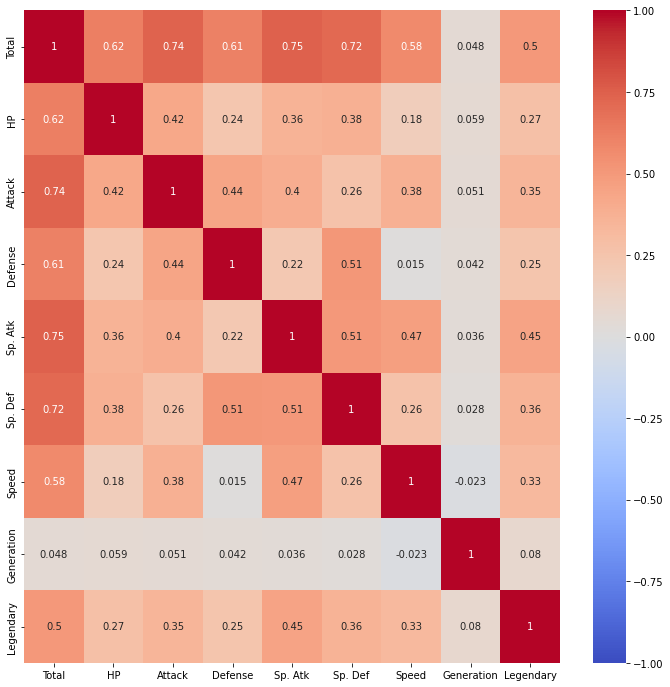

In [9]:
plt.figure(figsize = (12, 12))

sns.heatmap(df[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].corr(),
            vmin = -1,
            cmap = 'coolwarm',
            annot = True);

In [14]:
# select the colums for corelation
cor = df[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].corr()
cor_target = abs(cor["Legendary"])

relevant_features = cor_target[cor_target > 0.4]

# relevant_features
print("Colomns > 0.4")
print(relevant_features)

Colomns > 0.4
Total        0.501758
Sp. Atk      0.448907
Legendary    1.000000
Name: Legendary, dtype: float64


### Create a temporary subset using these 2 columns.

In [15]:
new_df = df[['Total', 'Sp. Atk']]

In [16]:
new_df

,Total,Sp. Atk
0,318,65
1,405,80
2,525,100
3,625,122
4,309,60
...,...,...
795,600,100
796,700,160
797,600,150
798,680,170


### Train and predict using the Isolation Forest, OneClassSVM, Elliptic Envelope, and LocalOutlierFactor.

In [20]:
# import the libraries
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

# Create the models
iforest = IsolationForest(n_estimators=100)
svm = OneClassSVM(nu=0.05)
envelope = EllipticEnvelope()
lof = LocalOutlierFactor(n_neighbors=20)

# Fit the models
iforest.fit(new_df)
svm.fit(new_df)
envelope.fit(new_df)
lof.fit_predict(new_df) # Use fit_predict instead of predict for LOF

# Predict the outliers
y_pred_iforest = iforest.predict(new_df)
y_pred_svm = svm.predict(new_df)
y_pred_envelope = envelope.predict(new_df)
y_pred_lof = lof.fit_predict(new_df)

# Print the results
n_outliers_iforest = (y_pred_iforest == -1).sum()
n_outliers_svm = (y_pred_svm == -1).sum()
n_outliers_envelope = (y_pred_envelope == -1).sum()
n_outliers_lof = (y_pred_lof == -1).sum()

print(f"Isolation Forest found {n_outliers_iforest} outliers")
print(f"One Class SVM found {n_outliers_svm} outliers")
print(f"Elliptic Envelope found {n_outliers_envelope} outliers")
print(f"Local Outlier Factor found {n_outliers_lof} outliers")


Isolation Forest found 164 outliers
One Class SVM found 43 outliers
Elliptic Envelope found 78 outliers
Local Outlier Factor found 27 outliers


### Create a grid 2x2 on scatter plots with the different colors for normal samples and outliers for each algorithm.

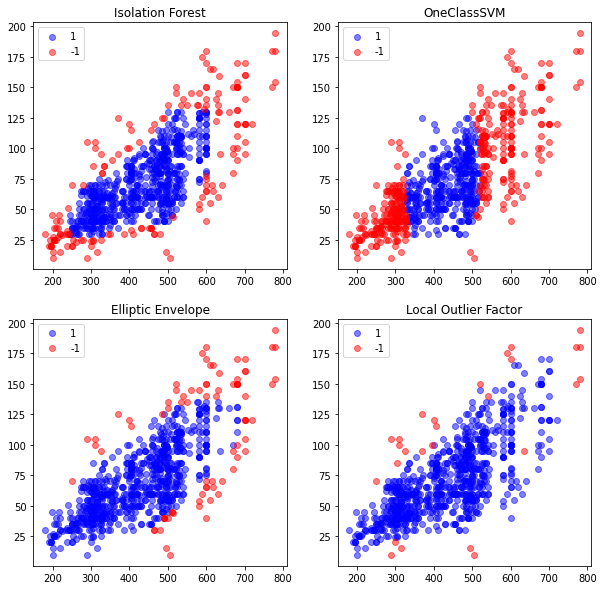

In [21]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Define the colors for normal samples and outliers
colors = {1: 'b', -1: 'r'}

# Loop through the algorithms and plot the data on the subplots
for i, (name, model) in enumerate(models.items()):
    # Fit the model and predict the outliers
    model.fit(new_df)
    y_pred = model.fit_predict(new_df)

    # Get the subplot to plot on
    ax = axs[i//2][i%2]

    # Loop through the classes (normal and outlier)
    for label, color in colors.items():
        # Get the indices of the samples for the current class
        indices = (y_pred == label)

        # Plot the samples for the current class with the appropriate color
        ax.scatter(new_df.iloc[indices, 0], new_df.iloc[indices, 1], c=color, label=label, alpha=0.5)

    # Set the title and legend for the subplot
    ax.set_title(name)
    ax.legend()

# Show the plot
plt.show()

### Try to make a conclusion based on these plots.

Din grafice pe care le-am creat și rezultatele obținute din calculele de mai sus putem observa faptul că Local Outlier Factor(LOF), are o acuratețe înaltă ceea ce și ne confirmă și punctele de pe grafic. 

De asemenea o detectarea îndeajuns de bună are și Eliptic Envelope.

--

Dacă să lăum detectarea cu o acurateți mai joasă este de la algorithmul OneClassSVM și după care urmează Isolation Forest, pe când din calcule mai sus rezultatele sunt invers. 

### Find the number of outliers on the whole Data Set (without the target column) for different values of contamination for each outliers detection algorithm.

In [40]:
all_new_df = df[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"]]
all_new_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
#,,,,,,,,
1,318,45,49,49,65,65,45,1
2,405,60,62,63,80,80,60,1
3,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
719,600,50,100,150,100,150,50,6
719,700,50,160,110,160,110,110,6
720,600,80,110,60,150,130,70,6


In [35]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [45]:
import pandas as pd

import warnings

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM

# suppress warning messages
warnings.filterwarnings("ignore")

# Define the range of contamination values to use
contamination_values = [0.01, 0.05, 0.1, 0.15, 0.2]

# Loop over each contamination value
for contamination in contamination_values:
    print("Contamination value:", contamination)
    
    # Fit and predict with the Isolation Forest model
    model = IsolationForest(contamination=contamination)
    model.fit(all_new_df)
    y_pred = model.predict(all_new_df)
    n_outliers = (y_pred == -1).sum()
    print("Isolation Forest - Number of outliers:", n_outliers)
    
    # Fit and predict with the Local Outlier Factor model
    model = LocalOutlierFactor(contamination=contamination)
    y_pred = model.fit_predict(all_new_df)
    n_outliers = (y_pred == -1).sum()
    print("Local Outlier Factor - Number of outliers:", n_outliers)
    
    # Fit and predict with the One-Class SVM model
    model = OneClassSVM(nu=contamination)
    model.fit(all_new_df)
    y_pred = model.predict(all_new_df)
    n_outliers = (y_pred == -1).sum()
    print("One-Class SVM - Number of outliers:", n_outliers)
    
    # Fit and predict with the Elliptic Envelope model
    model = EllipticEnvelope(contamination=contamination)
    y_pred = model.fit_predict(all_new_df)
    n_outliers = (y_pred == -1).sum()
    print("Elliptic Envelope - Number of outliers:", n_outliers)
    
    print()

Contamination value: 0.01
Isolation Forest - Number of outliers: 8
Local Outlier Factor - Number of outliers: 8
One-Class SVM - Number of outliers: 8
Elliptic Envelope - Number of outliers: 8

Contamination value: 0.05
Isolation Forest - Number of outliers: 40
Local Outlier Factor - Number of outliers: 40
One-Class SVM - Number of outliers: 39
Elliptic Envelope - Number of outliers: 40

Contamination value: 0.1
Isolation Forest - Number of outliers: 80
Local Outlier Factor - Number of outliers: 80
One-Class SVM - Number of outliers: 79
Elliptic Envelope - Number of outliers: 80

Contamination value: 0.15
Isolation Forest - Number of outliers: 120
Local Outlier Factor - Number of outliers: 120
One-Class SVM - Number of outliers: 119
Elliptic Envelope - Number of outliers: 120

Contamination value: 0.2
Isolation Forest - Number of outliers: 160
Local Outlier Factor - Number of outliers: 160
One-Class SVM - Number of outliers: 160
Elliptic Envelope - Number of outliers: 160



### Create for each algorithm the line plot showing the dependence of the number of outliers and the contamination value.

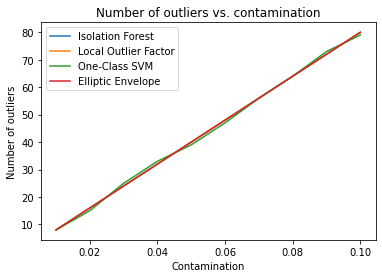

In [47]:
# Load data
df = pd.read_csv('pokemon.csv')

# Prepare data
all_new_df = df[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"]]
contamination_values = np.linspace(0.01, 0.1, num=10)

# Create a dictionary to store the results
results = {'Isolation Forest': [], 'Local Outlier Factor': [], 'One-Class SVM': [], 'Elliptic Envelope': []}

# Loop over the contamination values and compute the number of outliers for each algorithm
for contamination in contamination_values:
    # Isolation Forest
    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(all_new_df)
    y_pred = model.predict(all_new_df)
    n_outliers = (y_pred == -1).sum()
    results['Isolation Forest'].append(n_outliers)

    # Local Outlier Factor
    model = LocalOutlierFactor(contamination=contamination)
    y_pred = model.fit_predict(all_new_df)
    n_outliers = (y_pred == -1).sum()
    results['Local Outlier Factor'].append(n_outliers)

    # One-Class SVM
    model = OneClassSVM(nu=contamination)
    model.fit(all_new_df)
    y_pred = model.predict(all_new_df)
    n_outliers = (y_pred == -1).sum()
    results['One-Class SVM'].append(n_outliers)
    
    # Elliptic Envelope
    model = EllipticEnvelope(contamination=contamination)
    model.fit(all_new_df)
    y_pred = model.predict(all_new_df)
    n_outliers = (y_pred == -1).sum()
    results['Elliptic Envelope'].append(n_outliers)

# Plot the results
feature_names = list(all_new_df.columns)
for algorithm in results:
    plt.plot(contamination_values, results[algorithm], label=algorithm)
plt.xlabel('Contamination')
plt.ylabel('Number of outliers')
plt.title('Number of outliers vs. contamination')
plt.legend()
plt.show()

### Try to conclude.

Putem observa că cu câ contaminția e mai mare cu atât sunt mai multe outliers

### Split the Data Set into the train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(all_new_df, test_size=0.3, random_state=42)

### Using the default settings of each outliers detection algorithm, find and remove the outliers from the Data Set, creating a subset.

In [48]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

# Load data
# df = pd.read_csv('pokemon.csv')

# # Prepare data
# all_new_df = df[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"]]

# Apply outlier detection algorithms
outliers_if = IsolationForest(random_state=42).fit_predict(all_new_df)
outliers_lof = LocalOutlierFactor().fit_predict(all_new_df)
outliers_ocsvm = OneClassSVM().fit_predict(all_new_df)
outliers_ee = EllipticEnvelope().fit_predict(all_new_df)

# Find and remove the outliers from the dataset
new_df = all_new_df[(outliers_if == 1) & (outliers_lof == 1) & (outliers_ocsvm == 1) & (outliers_ee == 1)]

# Print the original and new dataframe shapes
print("Original dataframe shape:", all_new_df.shape)
print("New dataframe shape:", new_df.shape)

Original dataframe shape: (800, 8)
New dataframe shape: (385, 8)


### Train on the initial and the gotten subset of the following algorithms: LinearRegression and KNN Regressor.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(new_df.iloc[:, :-1], new_df.iloc[:, -1], test_size=0.2, random_state=42)

# Initialize the models
lr_model = LinearRegression()
knn_model = KNeighborsRegressor()

# Train the models on the initial dataset
lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Find and remove the outliers from the dataset
residuals = y_train - lr_model.predict(X_train)
outlier_indices = residuals[abs(residuals) > 3*residuals.std()].index.tolist()
clean_X_train, clean_y_train = [], []
for i in range(len(X_train)):
    if i not in outlier_indices:
        clean_X_train.append(X_train.iloc[i])
        clean_y_train.append(y_train.iloc[i])

# Train the models on the cleaned dataset
lr_model.fit(clean_X_train, clean_y_train)
knn_model.fit(clean_X_train, clean_y_train)

# Evaluate the models on the test set
print("Linear Regression score:", lr_model.score(X_test, y_test))
print("KNN Regression score:", knn_model.score(X_test, y_test))

Linear Regression score: -0.18449447238516226
KNN Regression score: -0.4585723727693325


### Find the accuracy of each combination of the prediction and outliers detection algorithms on the test subset.

In [63]:
from sklearn.metrics import mean_squared_error

# Compute predictions on the test set
lr_y_pred = lr_model.predict(X_test)
knn_y_pred = knn_model.predict(X_test)

# Compute mean squared error for each model
lr_mse = mean_squared_error(y_test, lr_y_pred)
knn_mse = mean_squared_error(y_test, knn_y_pred)

print("LinearRegression MSE:", lr_mse)
print("KNNRegressor MSE:", knn_mse)

LinearRegression MSE: 3.6272021657319957
KNNRegressor MSE: 4.466493506493506


### Make a conclusion based on the table that you got

Dacă să ne bazăm pe rezultatele obținute putem observa faptul că MSE la LR este mai mică ca KNNR, ce ne permite să spunem că regresian linară are o eroare mai joasă